<a href="https://colab.research.google.com/github/kobi-2/IUT-Lab-NumMethod/blob/main/Simpsons_Rules_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 01: 
Use the Multi Segment Simpsons 1/3 rule for finding Integral of the following function within the closed interval of $[0,1]$ and Plot the Relative Absolute Error for the different number of segments. The the integrad is as follows: 
$$ f(x) = 15\sqrt{x^{3}} + 8\sqrt[\leftroot{-1}\uproot{2}\scriptstyle 3]{x^{2}} + x $$


In [ ]:
from sympy import sympify, symbols, integrate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
 

x = symbols('x')


# original simpsons 1/3 method
def simpsons_one_third(f= None, a = 0, b = 1):  
    h = (b-a)/2
    one_third_result = (h/3) * (f.subs(x, a) + 4*f.subs(x,(a+b)/2) + f.subs(x,b) )   
    return one_third_result

# multisegment simpsons 1/3 method
def multi_segment_simpsons_one_third(f, a=0, b=1, n=2):
    if n%2 != 0:
      print("Please pass n as multiple of 2")
      return None
    h = (b-a)/n
    multi_one_third_result = 0
    for i in range(2,n+1, 2):
      multi_one_third_result = multi_one_third_result + simpsons_one_third(f=f, a=a+(i-2)*h, b=a+i*h)
    return multi_one_third_result 

# original simpsons 3/8 method
def simpsons_three_eighth(f= None, a = 0, b = 1):  
    h = (b-a)/3
    three_eight_result = (h*3/8) * (f.subs(x, a) + 3*f.subs(x,a+h) + 3*f.subs(x,a+2*h) + f.subs(x,b) )  
    return three_eight_result

# multisegment simpsons 3/8 method
def multi_segment_simpsons_three_eighth(f, a=0, b=1, n=0):
    if n%3 != 0:
      print("Please pass n as multiple of 3")
      return None
    h = (b-a)/n
    multi_three_eight_result = 0
    for i in range(3,n+1, 3):
      multi_three_eight_result = multi_three_eight_result + simpsons_three_eighth(f=f, a=a+(i-3)*h, b=a+i*h)
    return multi_three_eight_result


def combine_simpsons_rules(f, a=0, b=1, n=0):
    if n%5 != 0:
      print("Please pass n as multiple of 5")
      return None
    h = (b-a)/n
    comb_result = 0
    for i in range( 0, (n//5) ):
      _aa = a + i*5*h
      comb_result = comb_result + simpsons_one_third(f=f, a=_aa, b=_aa+2*h)
      comb_result = comb_result + simpsons_three_eighth(f=f, a=_aa+2*h, b=_aa+5*h)
    return comb_result 



# Input Parameters

In [ ]:
## experimental stuff: 
# h =1
# n = 15
# t = 0
# for i in range(0, (n//5)):
#     tt = t + i*5*h
#     print(tt, "\t", tt+2*h)
#     print(tt+2*h, "\t", tt+5*h)

In [ ]:
# Testing Stub
f = '15*(x^(1.5)) + 8*(x ^(0.6666667)) + x'
[a,b] = [0,1] 
f = sympify(f)

integral_f = integrate(f, x)
original_value = integral_f.subs(x, 1)- integral_f.subs(x, 0)

print(f'Given Integrad: {f}')
print(f'Original Integration: {integral_f}')
print('Original Result:', original_value) 

print(f'Numerical Prediction with simpsons 1/3 rule: {simpsons_one_third(f, a= a, b = b)}')
print(f'Numerical Prediction with multiple segment simpsons 1/3 rule: {multi_segment_simpsons_one_third(f, a= a, b = b, n= 16)}')

print(f'Numerical Prediction with simpsons 3/8 rule: {simpsons_three_eighth(f, a= a, b = b)}')
print(f'Numerical Prediction with multiple segment simpsons 3/8 rule: {multi_segment_simpsons_three_eighth(f, a= a, b = b, n=15)}')

print(f'Numerical Prediction with combined simpson\'s rules : {combine_simpsons_rules(f, a= a, b = b, n=15)}')


Given Integrad: 8*x**0.6666667 + x + 15*x**1.5
Original Integration: x**2/2 + 4.799999904*x**1.6666667 + 6.0*x**2.5
Original Result: 11.2999999040000
Numerical Prediction with simpsons 1/3 rule: 11.2286566280248
Numerical Prediction with multiple segment simpsons 1/3 rule: 11.2968442286354
Numerical Prediction with simpsons 3/8 rule: 11.2510719048650
Numerical Prediction with multiple segment simpsons 3/8 rule: 11.2956657629325
Numerical Prediction with combined simpson's rules : 11.2964870175773


# Error Calculation:

In [ ]:
errors_one_third, n_value_one_third = [ [] ,[] ]
errors_three_eighth, n_value_three_eighth = [ [] ,[] ]
errors_combine_rules, n_value_combine_rules = [ [] ,[] ]

n_hyper_bound = 41
for i in range(2, n_hyper_bound):
  if i%2 == 0:
    errors_one_third.append((original_value - multi_segment_simpsons_one_third(f, a= 0, b = 1, n= i))/original_value*100)
    n_value_one_third.append(i)
  if i%3 == 0:
    errors_three_eighth.append((original_value - multi_segment_simpsons_three_eighth(f, a= 0, b = 1, n= i))/original_value*100)
    n_value_three_eighth.append(i)
  if i%5== 0:
    errors_combine_rules.append((original_value - combine_simpsons_rules(f, a= 0, b = 1, n= i))/original_value*100)
    n_value_combine_rules.append(i)

# Error Plotting

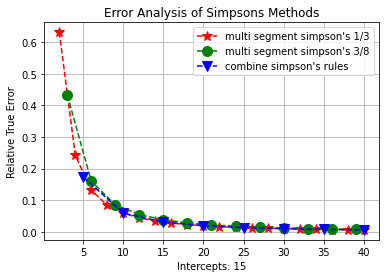

In [ ]:
plt.Figure(figsize=(12,8), facecolor='black', linewidth=2)

plt.plot(n_value_one_third, errors_one_third, color='red', linestyle='dashed', marker='*', markerfacecolor='red', markersize=10)

plt.plot(n_value_three_eighth, errors_three_eighth, color='green', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)
plt.plot(n_value_combine_rules, errors_combine_rules, color='blue', linestyle='dashed', marker='v', markerfacecolor='blue', markersize=10)
plt.legend(['multi segment simpson\'s 1/3', 'multi segment simpson\'s 3/8', 'combine simpson\'s rules'])

plt.grid(axis = 'both')
plt.xlabel(f'Intercepts: {n}')
plt.ylabel('Relative True Error')
plt.title('Error Analysis of Simpsons Methods')
plt.show()